In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\aswat\\Desktop\\Employee.csv")

In [3]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [5]:
df.shape

(148, 6)

In [6]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [7]:
df.rename(columns={'old_name':'new_name'}, inplace=True)

In [8]:
df.drop_duplicates(inplace=True)

### DATA CLEANING

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      127 non-null    float64
 2   Salary   121 non-null    float64
 3   Place    130 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB


In [10]:
df.describe()

,Age,Salary,Gender
count,127.000000,121.000000,144.000000
mean,30.527559,5283.471074,0.222222
std,11.114717,2585.373600,0.417191
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,37.500000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [11]:
unique_values = df.nunique()
print("Unique Values in Each Feature:")
print(unique_values)

Unique Values in Each Feature:
Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64


In [12]:
df['Age'] = df['Age'].replace(0, np.nan)

In [13]:
df = df.dropna()

In [14]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64


In [15]:
df.dropna(inplace=True)

C:\Users\aswat\AppData\Local\Temp\ipykernel_15040\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [16]:
df.drop_duplicates(inplace=True)

C:\Users\aswat\AppData\Local\Temp\ipykernel_15040\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


### Data Analysis

In [17]:
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]

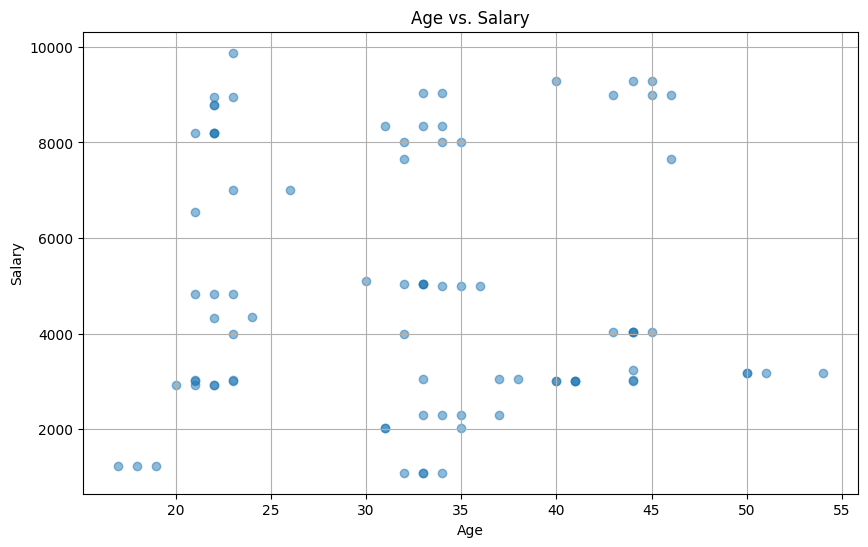

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Salary'], alpha=0.5)
plt.title('Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

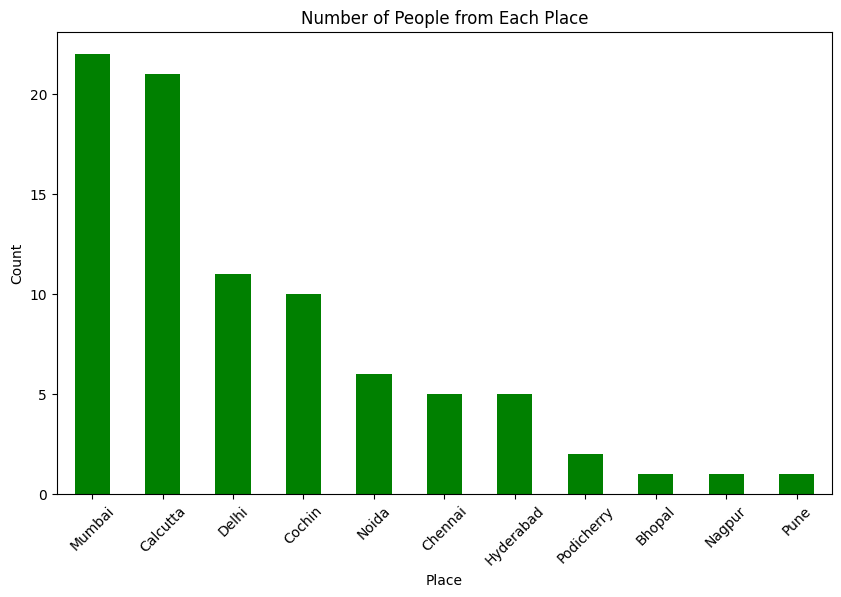

In [19]:
place_counts = df['Place'].value_counts()

plt.figure(figsize=(10, 6))
place_counts.plot(kind='bar', color='g')
plt.xlabel('Place')
plt.ylabel('Count')
plt.title('Number of People from Each Place')
plt.xticks(rotation=45)
plt.show()

### Data Encoding

In [20]:
df

,Company,Age,Salary,Place,Country,Gender
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [21]:
df_encoded = pd.get_dummies(df, columns=['Place'])

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Salary'] = le.fit_transform(df['Salary'])

C:\Users\aswat\AppData\Local\Temp\ipykernel_15040\767312004.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'] = le.fit_transform(df['Salary'])


In [23]:
print(df_encoded)
print(df)

             Company   Age  Salary Country  Gender  Place_Bhopal  \
2                TCS  35.0  2300.0   India       0         False   
3            Infosys  40.0  3000.0   India       0         False   
4                TCS  23.0  4000.0   India       0         False   
7            Infosys  23.0  7000.0   India       1         False   
8                TCS  34.0  8000.0   India       1         False   
..               ...   ...     ...     ...     ...           ...   
142  Infosys Pvt Lmt  22.0  8202.0   India       0         False   
143              TCS  33.0  9024.0   India       1         False   
145          Infosys  44.0  4034.0   India       1         False   
146              TCS  33.0  5034.0   India       1         False   
147          Infosys  22.0  8202.0   India       0         False   

     Place_Calcutta  Place_Chennai  Place_Cochin  Place_Delhi  \
2              True          False         False        False   
3             False          False         False     

### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaled_data_standard = scaler.fit_transform(df_encoded[['Age', 'Salary']])
print("Standardized Data:")
print(scaled_data_standard)

Standardized Data:
[[ 0.25682503 -0.99729809]
 [ 0.79451289 -0.73388425]
 [-1.03362585 -0.35757876]
 [-1.03362585  0.77133771]
 [ 0.14928745  1.1476432 ]
 [ 1.33220076  1.52394869]
 [ 0.14928745 -1.45300403]
 [-1.57131372 -1.39843974]
 [ 0.79451289 -0.73388425]
 [-1.03362585 -0.73388425]
 [-1.03362585 -0.72259508]
 [ 0.14928745  0.01872673]
 [ 0.47190017 -0.7169505 ]
 [ 1.86988863 -0.66464404]
 [-1.248701   -0.04750303]
 [-1.03362585  1.50249927]
 [ 0.14928745  1.27746859]
 [ 1.33220076  1.63081944]
 [-1.03362585  1.85359229]
 [ 0.25682503 -1.09739535]
 [ 1.43973834  1.0174415 ]
 [-1.35623857 -0.75872041]
 [ 1.33220076 -0.34478437]
 [ 0.14928745 -0.99729809]
 [ 0.90205047 -0.73388425]
 [-0.92608828 -0.22775336]
 [ 0.25682503  1.1476432 ]
 [ 1.43973834  1.52394869]
 [-0.06578769 -1.45300403]
 [-1.46377615 -1.39843974]
 [ 0.90205047 -0.73388425]
 [-1.248701   -0.72259508]
 [ 0.25682503  0.01872673]
 [-1.248701    0.59974241]
 [-0.06578769  1.0174415 ]
 [ 0.57943775 -0.7169505 ]
 [ 1.9774

In [26]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_data_minmax = scaler.fit_transform(df_encoded[['Age', 'Salary']])
print("MinMax Scaled Data:")
print(scaled_data_minmax)

MinMax Scaled Data:
[[0.48648649 0.13781723]
 [0.62162162 0.21748037]
 [0.16216216 0.33128485]
 [0.16216216 0.6726983 ]
 [0.45945946 0.78650279]
 [0.75675676 0.90030727]
 [0.45945946 0.        ]
 [0.02702703 0.01650165]
 [0.62162162 0.21748037]
 [0.16216216 0.21748037]
 [0.16216216 0.2208945 ]
 [0.45945946 0.44508934]
 [0.54054054 0.22260157]
 [0.89189189 0.23842039]
 [0.10810811 0.42505975]
 [0.16216216 0.89382042]
 [0.45945946 0.82576534]
 [0.75675676 0.93262775]
 [0.16216216 1.        ]
 [0.48648649 0.10754524]
 [0.78378378 0.74712644]
 [0.08108108 0.20996927]
 [0.75675676 0.33515421]
 [0.45945946 0.13781723]
 [0.64864865 0.21748037]
 [0.18918919 0.3705474 ]
 [0.48648649 0.78650279]
 [0.78378378 0.90030727]
 [0.40540541 0.        ]
 [0.05405405 0.01650165]
 [0.64864865 0.21748037]
 [0.10810811 0.2208945 ]
 [0.48648649 0.44508934]
 [0.10810811 0.62080346]
 [0.40540541 0.74712644]
 [0.56756757 0.22260157]
 [0.91891892 0.23842039]
 [0.16216216 0.42505975]
 [0.37837838 0.10754524]
 [0.1